In [1]:
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns

import folium

#import goslate
#import langdetect
#import translate

import geopy.distance as gd

In [2]:
%matplotlib inline
sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)

In [ ]:
pd.set_option()

In [3]:
df = pd.read_csv('Dataset/starbucks.csv')

In [4]:
# A quick look at the dataset
df.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


In [5]:
df.Country.unique()

array(['AD', 'AE', 'AR', 'AT', 'AU', 'AW', 'AZ', 'BE', 'BG', 'BH', 'BN',
       'BO', 'BR', 'BS', 'CA', 'CH', 'CL', 'CN', 'CO', 'CR', 'CW', 'CY',
       'CZ', 'DE', 'DK', 'EG', 'ES', 'FI', 'FR', 'GB', 'GR', 'GT', 'HU',
       'ID', 'IE', 'IN', 'JO', 'JP', 'KH', 'KR', 'KW', 'KZ', 'LB', 'LU',
       'MA', 'MC', 'MX', 'MY', 'NL', 'NO', 'NZ', 'OM', 'PA', 'PE', 'PH',
       'PL', 'PR', 'PT', 'QA', 'RO', 'RU', 'SA', 'SE', 'SG', 'SK', 'SV',
       'TH', 'TR', 'TT', 'TW', 'US', 'VN', 'ZA'], dtype=object)

In [6]:
df.rename(columns = {'State/Province': 'Province'}, inplace = True)

In [7]:
df['Ownership Type'].value_counts()

Company Owned    11932
Licensed          9375
Joint Venture     3976
Franchise          317
Name: Ownership Type, dtype: int64

In [29]:
len(df)

25599

In [8]:
df_canada = df.loc[df.Country.isin(['CA'])].reset_index(drop = True).copy()
df_canada_on = df.loc[df.Country.isin(['CA']) & df.Province.isin(['ON'])].reset_index(drop = True).copy()

In [9]:
df_canada.Province.unique()

array(['AB', 'BC', 'MB', 'NB', 'NL', 'NS', 'ON', 'PE', 'QC', 'SK', 'YT'],
      dtype=object)

In [10]:
def type_color(x):
   
    if x == 'Company Owned':
        color = 'green'
    elif x == 'Franchise':
        color = 'yellow'
    elif x == 'Licensed':
        color = 'orange'
    else:
        color = 'red'
    return color

df['type_color'] = df['Ownership Type'].apply(lambda x: type_color(x))

### **Starbucks Stores in ON, Canada**

In [11]:
len(df_canada), len(df_canada_on)

(1468, 534)

In [12]:
print(df_canada.isnull().sum(), '\n')
print(df_canada_on.isnull().sum())

Brand               0
Store Number        0
Store Name          0
Ownership Type      0
Street Address      0
City                0
Province            0
Country             0
Postcode            4
Phone Number      154
Timezone            0
Longitude           0
Latitude            0
dtype: int64 

Brand              0
Store Number       0
Store Name         0
Ownership Type     0
Street Address     0
City               0
Province           0
Country            0
Postcode           0
Phone Number      31
Timezone           0
Longitude          0
Latitude           0
dtype: int64


In [13]:
len(df_canada.Province.unique())

11

In [14]:
len(df_canada.City.unique()), len(df_canada_on.City.unique())

(221, 72)

In [15]:
# Check dubplicated observations
display(df_canada[df_canada.duplicated()])
display(df_canada_on[df_canada_on.duplicated()])

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude


,Brand,Store Number,Store Name,Ownership Type,Street Address,City,Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude


### Seaborn / Matlibplot Annotation

In [16]:
# Annotation function
def annotate_perct(ax_plot, total, add_height, rot):
    for p in ax_plot.patches:
        if np.isnan(p.get_height()):
            height = 0
            ax_plot.text(p.get_x() + p.get_width()/2., height, '', ha="center", va='center', fontsize=10, rotation = rot)  
        else:
            height = p.get_height()
            ax_plot.text(p.get_x() + p.get_width()/2., height + add_height, '{}  ( {}% )'.format(int(height), round((round(height / total, 3) * 100), 1)), ha="center", va='center', fontsize=10, rotation = rot)

### Seaborn Single & Multiple Plots

In [17]:
# Annotation function
def annotate_perct(ax_plot, total, add_height, rot):
    for p in ax_plot.patches:
        if np.isnan(p.get_height()):
            height = 0
            ax_plot.text(p.get_x() + p.get_width()/2., height, '', ha="center", va='center', fontsize=10, rotation = rot)  
        else:
            height = p.get_height()
            ax_plot.text(p.get_x() + p.get_width()/2., height + add_height, '{}  ( {}% )'.format(int(height), round((round(height / total, 3) * 100), 1)), ha="center", va='center', fontsize=10, rotation = rot)
            
            
# Count plot function
def func_countplot_autoplot(ncols, plot_width, plot_length, x, order, height, total, rot, title, xlabel, ylabel, xrot, palette):   
    
    if ncols == 1:
        plt.figure(figsize = (plot_width, plot_length))
        
        _ = sns.countplot(x = x, order = order, palette = palette) 
        annotate_perct(ax_plot = _, add_height= height, total= total, rot= rot)
        
        _.set_title(title, pad = 10, weight= 'bold')
        _.set_xlabel(xlabel)
        _.set_xticklabels(_.get_xticklabels(), rotation = xrot)
        _.set_ylabel(ylabel)
        plt.show()
        
    elif ncols < 5:    
        fig, ax = plt.subplots(ncols = ncols, figsize= (plot_width, plot_length))
        
        for i in range(0, ncols):
            sns.countplot(x = x[i], order = order[i], palette = palette[i], ax = ax[i]) 
            annotate_perct(ax_plot = ax[i], add_height= height[i], total= total[i], rot= rot[i])
            ax[i].set_title(title[i], pad = 10, weight= 'bold')
            ax[i].set_xlabel(xlabel[i])
            ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = xrot[i])
            ax[i].set_ylabel(ylabel[i])
        plt.show()
        
    else:
        print('Error. You can not plot more than 4 graphs in 1 row.')
        
            
# Bar plot function
def func_barplot_autoplot(ncols, plot_width, plot_length, x, y, hue, order, height, total, rot, title, xlabel, ylabel, xrot, palette):
    
    if ncols == 1:
        plt.figure(figsize = (plot_width, plot_length))
        
        _ = sns.barplot(x = x, y = y, hue = hue, order = order, palette = palette) 
        annotate_perct(ax_plot = _, add_height= height, total= total, rot= rot)
        _.set_title(title, pad = 10, weight= 'bold')
        _.set_xlabel(xlabel)
        _.set_xticklabels(_.get_xticklabels(), rotation = xrot)
        _.set_ylabel(ylabel)
        plt.show()
    
    elif ncols < 5:
        fig, ax = plt.subplots(ncols = ncols, figsize= (plot_width, plot_length))

        for i in range(0, ncols): 
            sns.barplot(x = x[i], y = y[i], hue = hue[i], order = order[i], palette = palette[i], ax = ax[i]) 
            annotate_perct(ax_plot = ax[i], add_height= height[i], total= total[i], rot= rot[i])
            ax[i].set_title(title[i], pad = 10, weight= 'bold')
            ax[i].set_xlabel(xlabel[i])
            ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = xrot[i])
            ax[i].set_ylabel(ylabel[i])
        plt.show()
    
    else:
        print('Error. You can not plot more than 4 graphs in 1 row.')
        
    
# Scatter plot function    
def func_scatterplot_autoplot(ncols, plot_width, plot_length, x, y, title, xlabel, ylabel, xrot, palette):
    
    if ncols == 1:
        plt.figure(figsize = (plot_width, plot_length))
        _ = sns.scatterplot(x = x, y = y, palette = palette) 
        _.set_title(title, pad = 10, weight= 'bold')
        _.set_xlabel(xlabel)
        _.set_xticklabels(_.get_xticklabels(), rotation = xrot)
        _.set_ylabel(ylabel)
        plt.show()
    
    elif ncols < 5:
        fig, ax = plt.subplots(ncols = ncols, figsize= (plot_width, plot_length))
        for i in range(0, ncols):
            sns.scatterplot(x = x[i], y = y[i], palette = palette, ax = ax[i]) 
            ax[i].set_title(title[i], pad = 10, weight= 'bold')
            ax[i].set_xlabel(xlabel[i])
            ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = xrot[i])
            ax[i].set_ylabel(ylabel[i])
        plt.show()
    
    else:
        print('Error. You can not plot more than 4 graphs in 1 row.')

        
# Distribution / Histogram plot function            
def func_distplot_autoplot(ncols, plot_width, plot_length, x, title, xlabel, xrot, bins, rug, color):

    if ncols == 1:
        plt.figure(figsize = (plot_width, plot_length))
        _ = sns.distplot(x, color = color, bins = bins, rug = rug) 
        _.set_title(title, pad = 10, weight= 'bold')
        _.set_xlabel(xlabel)
        _.set_xticklabels(_.get_xticklabels(), rotation = xrot)
        plt.show()

    elif ncols < 5:
        fig, ax = plt.subplots(ncols = ncols, figsize= (plot_width, plot_length))
        for i in range(0, ncols):
            sns.distplot(x[i], color = color[i], bins = bins[i], rug = rug[i], ax = ax[i]) 
            ax[i].set_title(title[i], pad = 10, weight= 'bold')
            ax[i].set_xlabel(xlabel[i])
            ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation = xrot[i])
        plt.show()
    
    else:
        print('Error. You can not plot more than 4 graphs in 1 row.')

In [18]:
province = df_canada.Province.value_counts().reset_index().rename(columns = {'index':'province', 'Province': 'counts'})
province

,province,counts
0,ON,534
1,BC,412
2,AB,288
3,QC,105
4,MB,54
5,SK,30
6,NS,20
7,NB,14
8,NL,7
9,PE,2


In [19]:
allcities = df_canada.City.value_counts()[:10].reset_index().rename(columns = {'index':'city', 'City': 'counts'})
allcities

,city,counts
0,Toronto,192
1,Calgary,130
2,Vancouver,110
3,Edmonton,81
4,Montreal,59
5,Winnipeg,49
6,Ottawa,42
7,Mississauga,39
8,Surrey,30
9,Victoria,29


In [20]:
oncities = df_canada_on.City.value_counts()[:10].reset_index().rename(columns = {'index':'city', 'City': 'counts'})
oncities

,city,counts
0,Toronto,192
1,Ottawa,42
2,Mississauga,39
3,London,20
4,Burlington,14
5,Oakville,12
6,Brampton,12
7,Niagara Falls,12
8,Vaughan,10
9,Markham,10


In [21]:
top_countries = df.Country.value_counts().keys().tolist()[:15]
worldwide = df.loc[df.Country.isin(top_countries)].groupby(['Country', 'Ownership Type']).size().reset_index().rename(columns = {0: 'counts'}).copy()
worldwide

,Country,Ownership Type,counts
0,AE,Licensed,144
1,CA,Company Owned,1097
2,CA,Licensed,371
3,CN,Company Owned,1339
4,CN,Joint Venture,1220
5,CN,Licensed,175
6,DE,Company Owned,142
7,DE,Licensed,18
8,GB,Company Owned,347
9,GB,Franchise,302


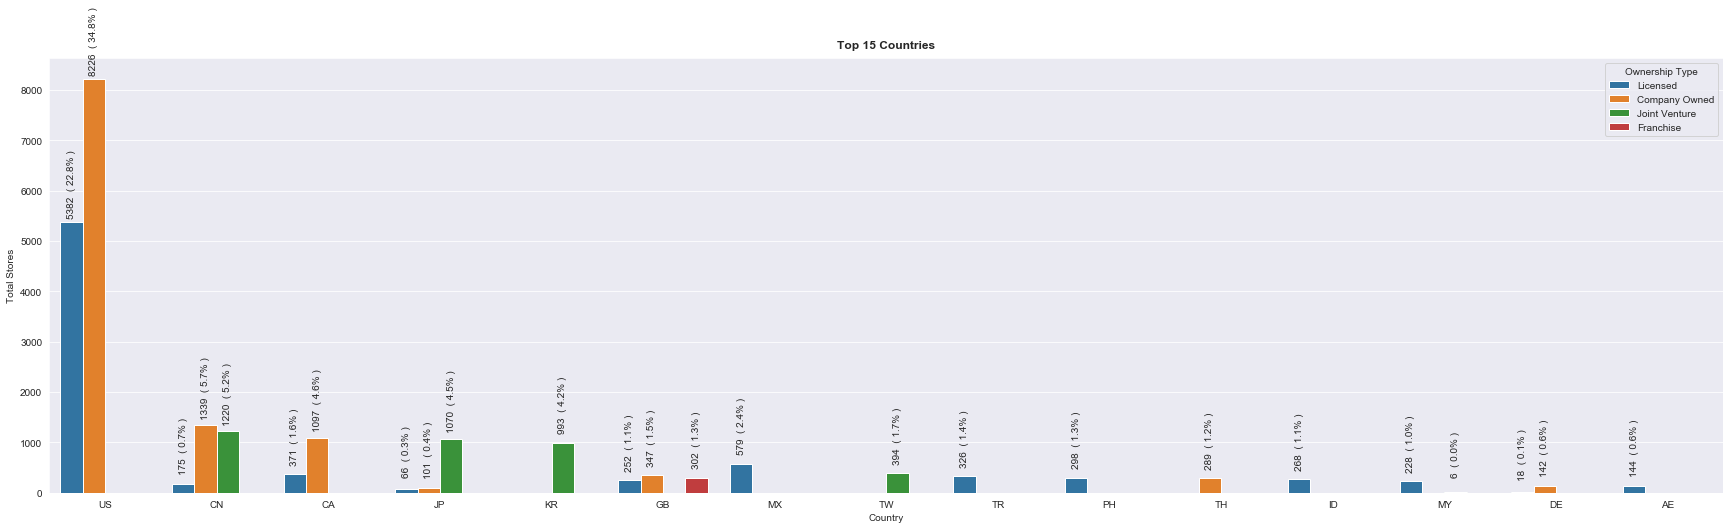

In [31]:
func_barplot_autoplot( ncols       = 1,
                       plot_width  = 30,
                       plot_length = 8, 
                       x       = worldwide.Country,
                       y       = worldwide.counts,
                       hue     = worldwide['Ownership Type'],
                       order   = top_countries,
                       height  = 750, 
                       total   = worldwide.counts.sum(), 
                       rot     = 90, 
                       title   = 'Top 15 Countries', 
                       xlabel  = 'Country', 
                       ylabel  = 'Total Stores',
                       xrot    = None,
                       palette = None)

In [102]:
worldwide

,Country,Ownership Type,counts
0,AE,Licensed,144
1,CA,Company Owned,1097
2,CA,Licensed,371
3,CN,Company Owned,1339
4,CN,Joint Venture,1220
5,CN,Licensed,175
6,DE,Company Owned,142
7,DE,Licensed,18
8,GB,Company Owned,347
9,GB,Franchise,302


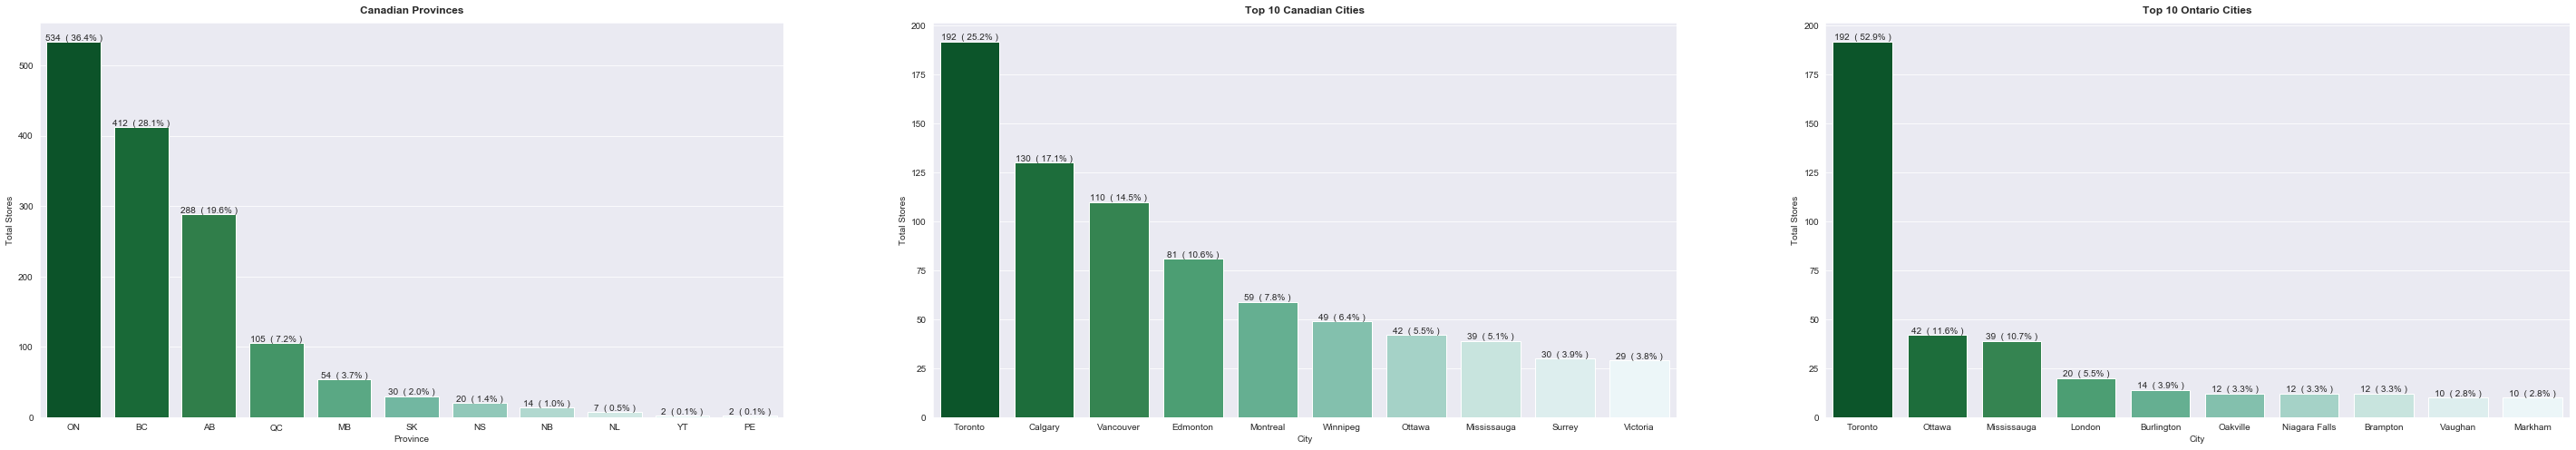

In [238]:
func_barplot_autoplot( ncols       = 3,
                       plot_width  = 50,
                       plot_length = 8, 
                       x       = [province.province, allcities.city, oncities.city],
                       y       = [province.counts, allcities.counts, oncities.counts],
                       hue     = [None, None, None],
                       order   = [None, None, None],
                       height  = [5, 2, 2], 
                       total   = [province.counts.sum(), allcities.counts.sum(), oncities.counts.sum()], 
                       rot     = [None, None, None], 
                       title   = ['Canadian Provinces', 'Top 10 Canadian Cities', 'Top 10 Ontario Cities'], 
                       xlabel  = ['Province', 'City', 'City'], 
                       ylabel  = ['Total Stores', 'Total Stores', 'Total Stores'],
                       xrot    = [None, None, None],
                       palette = ['BuGn_r', 'BuGn_r', 'BuGn_r'])

In [23]:
def world_map():
    return folium.Map(location = [35.630299, 5.412317], zoom_start = 4.2, control_scale = True, tiles ='Cartodb dark_matter')

def canada_map():
    return folium.Map(location = [58.144787, -104.952965], zoom_start = 4.2, control_scale = True, tiles ='Cartodb dark_matter')

In [321]:
df.isnull().sum()

Brand                0
Store Number         0
Store Name           0
Ownership Type       0
Street Address       2
City                15
Province             0
Country              0
Postcode          1522
Phone Number      6861
Timezone             0
Longitude            1
Latitude             1
type_color           0
dtype: int64

In [322]:
df.loc[~(df.Longitude.isnull() & df.Latitude.isnull())].isnull().sum()

Brand                0
Store Number         0
Store Name           0
Ownership Type       0
Street Address       2
City                15
Province             0
Country              0
Postcode          1522
Phone Number      6860
Timezone             0
Longitude            0
Latitude             0
type_color           0
dtype: int64

In [24]:
df = df.loc[~(df.Longitude.isnull() & df.Latitude.isnull())].reset_index(drop = True)

In [27]:
#df.to_csv('starbucks_tableau_map.csv')

In [26]:
stores_coordinates_arr = np.array(df[['Latitude', 'Longitude']], dtype= 'float32') 

cmap = world_map()

for i in range(0, 500):
    folium.CircleMarker(stores_coordinates_arr[i], radius = 0.01, fill = True, opacity = 0.5, color = df.type_color[i]).add_to(cmap)
    
cmap

In [250]:
stores_coordinates_arr = np.array(df_canada[['Latitude', 'Longitude']], dtype= 'float32') 

cmap = canada_map()

for i in range(len(df_canada)):
    folium.CircleMarker(stores_coordinates_arr[i], radius = 0.01, fill = True, opacity = 0.5, color = df_canada.type_color[i]).add_to(cmap)
    
cmap

In [251]:
stores_coordinates_arr = np.array(df_canada_on[['Latitude', 'Longitude']], dtype= 'float32') # Has to be 'pickup_latitude', 'pickup_longitude' for the map plotting

cmap = canada_map()

for i in range(len(df_canada_on)):
    folium.CircleMarker(stores_coordinates_arr[i], radius = 0.01, fill = True, opacity = 0.5, color = df_canada_on.type_color[i]).add_to(cmap)
    
cmap

In [106]:
df_canada_on['type_color'] = df_canada_on['Ownership Type'].apply(lambda x: 'green' if x == 'Company Owned' else 'orange')
stores_coordinates_arr = np.array(df_canada_on.loc[df_canada_on.City.isin(['Toronto'])][['Latitude', 'Longitude']], dtype= 'float32') # Has to be 'pickup_latitude', 'pickup_longitude' for the map plotting

cmap = canada_map()

for i in range(len(df_canada_on.loc[df_canada_on.City.isin(['Toronto'])])):
    store_name  = df_canada_on.loc[df_canada_on.City.isin(['Toronto']), 'Store Name'].tolist()[i]
    street_name = df_canada_on.loc[df_canada_on.City.isin(['Toronto']), 'Street Address'].tolist()[i]
    tooltip = store_name + ' | ' + street_name
    folium.CircleMarker(stores_coordinates_arr[i], radius = 4, fill = True, opacity = 1, tooltip = tooltip, color = df_canada_on.type_color[i]).add_to(cmap)
    
cmap

### **Ownership**

In [114]:
ownership = df_canada['Ownership Type'].value_counts().reset_index().rename(columns = {'index': 'type', 'Ownership Type': 'counts'})
ownership

,type,counts
0,Company Owned,1097
1,Licensed,371


In [118]:
ownership_province = df_canada.groupby(['Province', 'Ownership Type']).size().reset_index().rename(columns = {'Province': 'province', 0: 'counts', 'Ownership Type': 'type'})
ownership_province

,province,type,counts
0,AB,Company Owned,183
1,AB,Licensed,105
2,BC,Company Owned,319
3,BC,Licensed,93
4,MB,Company Owned,29
5,MB,Licensed,25
6,NB,Company Owned,12
7,NB,Licensed,2
8,NL,Company Owned,6
9,NL,Licensed,1


In [119]:
ownership_on = df_canada_on.groupby(['City', 'Ownership Type']).size().reset_index().rename(columns = {'City': 'city', 0: 'counts', 'Ownership Type': 'type'})
ownership_on

,city,type,counts
0,Ajax,Company Owned,2
1,Ancaster,Company Owned,3
2,Ancaster,Licensed,1
3,Aurora,Company Owned,3
4,Aurora,Licensed,1
...,...,...,...
95,Windsor,Company Owned,7
96,Woodbridge,Company Owned,2
97,Woodbridge,Licensed,2
98,Woodstock,Licensed,1


In [125]:
province_order = province.province.tolist()
oncities_order = oncities.city.tolist()

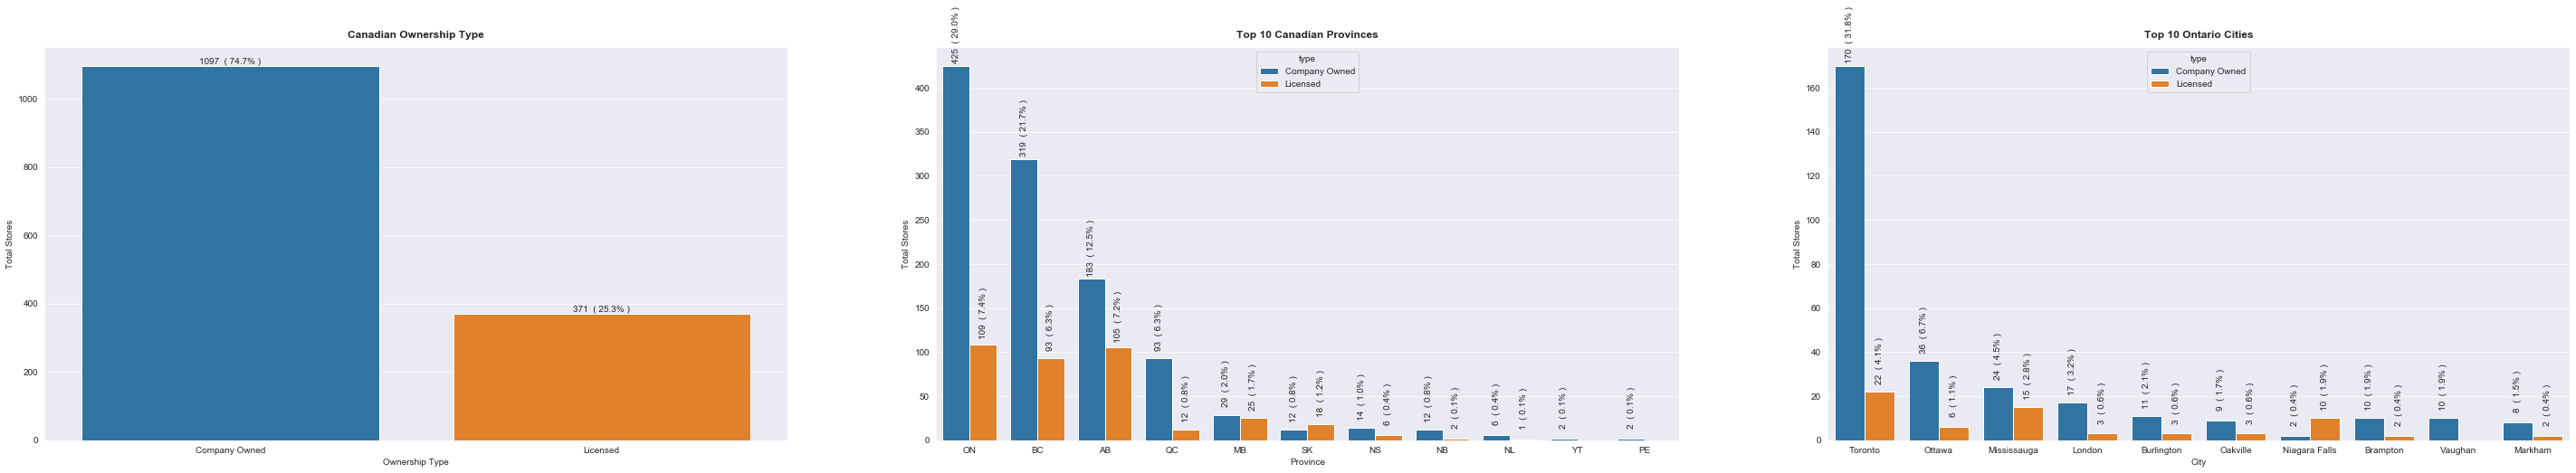

In [142]:
func_barplot_autoplot( ncols       = 3,
                       plot_width  = 50,
                       plot_length = 8, 
                       x       = [ownership.type, ownership_province.province, ownership_on.city],
                       y       = [ownership.counts, ownership_province.counts, ownership_on.counts],
                       hue     = [None, ownership_province.type, ownership_on.type],
                       order   = [None, province_order, oncities_order],
                       height  = [12, 35, 14], 
                       total   = [ownership.counts.sum(), ownership_province.counts.sum(), ownership_on.counts.sum()],
                       rot     = [None, 90, 90], 
                       title   = ['Canadian Ownership Type', 'Top 10 Canadian Provinces', 'Top 10 Ontario Cities'], 
                       xlabel  = ['Ownership Type', 'Province', 'City'], 
                       ylabel  = ['Total Stores', 'Total Stores', 'Total Stores'],
                       xrot    = [None, None, None],
                       palette = [None, None, None])

# Distance
 - Calculate the distance betweeen Starbucks stores in Kuwait

In [107]:
toronto_stores = df_canada_on.loc[df_canada_on.City.isin(['Toronto'])].reset_index(drop = True).copy()
toronto_stores.sort_values(by = ['Longitude', 'Latitude']).reset_index(drop = True, inplace = True)
toronto_stores['coordinates'] = list(zip(toronto_stores.Latitude, toronto_stores.Longitude))
toronto_stores[:5]

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude,type_color,coordinates
0,Starbucks,27133-154144,Church & Gerrard,Company Owned,66 Gerrard Street East,Toronto,ON,CA,M5B 1G3,416 593 8487,GMT-05:00 America/Toronto,-79.38,43.66,green,"(43.66, -79.38)"
1,Starbucks,4720-103563,Dundas & Roncesvalles,Company Owned,2201 Dundas Street West,Toronto,ON,CA,M6R 1X5,416-538-0211,GMT-05:00 America/Toronto,-79.45,43.65,green,"(43.65, -79.45)"
2,Starbucks,17624-176765,Dundas & Aukland,Company Owned,5251 Dundas Street West,Toronto,ON,CA,M9B 1B2,(416) 231-2098,GMT-05:00 America/Toronto,-79.54,43.64,green,"(43.64, -79.54)"
3,Starbucks,75438-106189,University of Toronto/Toronto/Medic,Licensed,1 King's College Circle,Toronto,ON,CA,M5S 1A8,4165984342,GMT-05:00 America/Toronto,-79.40,43.66,orange,"(43.66, -79.4)"
4,Starbucks,4232-772,250 Queen St. W.,Company Owned,250 Queen Street West,Toronto,ON,CA,M5V 1Z7,(416) 595-5868,GMT-05:00 America/Toronto,-79.39,43.65,green,"(43.65, -79.39)"


In [108]:
len(toronto_stores)

192

In [109]:
pd.DataFrame( np.zeros(len(toronto_stores) ** 2).reshape(len(toronto_stores), len(toronto_stores)), index = toronto_stores.index, columns = toronto_stores.index )

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [110]:
# Function to automatically get the distance between points (in KM)
def get_distance(col):
    end = toronto_stores.loc[col.name]['coordinates']
    km_dist = toronto_stores['coordinates'].apply(gd.vincenty, args=(end,), ellipsoid='WGS-84')
    return km_dist

#I'm transposing the DataFrame inorder to used the loc[] method to get distances later on
distances = toronto_stores.apply(get_distance, axis=1).T

# Funtion to clean and shorten the distances in KM i.e. 24.252668 km -> 24.3
def format_result(input_instance):
    return round(float(re.sub('[\sa-zA-Z]', '', str(input_instance))),1)

distances = distances.applymap(format_result)

# Rename indexes and columns 
distances.columns = toronto_stores['Store Name'].tolist()
distances.index   = toronto_stores['Store Name'].tolist()

# Display results
distances

,Church & Gerrard,Dundas & Roncesvalles,Dundas & Aukland,University of Toronto/Toronto/Medic,250 Queen St. W.,65 Queen Street West Concourse,1088 Yonge St,York Mills Centre,Ellesmere & Midland D/T,900 Eglinton Ave. W.,Radisson Admiral Toronto Harbourfro,Bloor & Church,Yonge & College,Brookfield Place Front/Bay - PATH,Coxwell & Plains,Danforth & Broadview,6 Charles Street (aka 675 Yonge),Finch & Chesswood,Thompson Residences,Richmond Adelaide Ctr -PATH Concrse,Dupont & Christie,Bathurst & Finch,Cumberland & Critchley Lane,Longos @ Leaside,Metro Liberty Village - #720,145 Richmond Street West,Brookfield Place - PATH Concourse,Yorkdale Indigo,765 Yonge,Longo's York Mills,Finch & Hwy 27,Dundas & Elizabeth,Dynamic Funds Tower - 1 Adelaide E,2253 Queen St. E. & Hammersmith,205 College at Beverly,Laird & Wicksteed,1545 Bayview,International Plaza Hotel,King & Peter,Teavana - Scotia Plaza,485 Church at Wellesley,1740-42 Avenue Rd.,Royal Bank Plaza - PATH Concourse,1984 Queen St.East,Bathurst & Fleet,Birchmount & Sheppard,Church & Adelaide,Laird Eglinton,Castlefield & Caledonia CA,Marriott Renaissance Hotel Toronto,Don Mills & Lawrence,Bay & Cumberland,Yonge & Gerrard,Sherway Gardens,95 Wellington,Bedford & Bloor,Parkhome Concourse,Yonge & Park Home,Kingston Rd & Bingham Ave,Longos-Bloor St,Teavana - Brookfield Place,Yonge & Dundas,Spadina & Fort York,Bay & Grosvenor,Simcoe Place,8 Wellesley,30 Carlton St E - Holiday Inn,Bathurst & Sheppard,Bloor & Bay (Holt Renfrew Centre),Southcore Financial Tower,Yonge & Eglinton- Minto Tower,829 The Queensway,Danforth & Langford,King & Dufferin,Allen Road & Rimrock Road,King Street West & Blue Jays Way,Bloor & Thompson,Dundas & Quebec,University of Toronto - Scarborough,542 College / Euclid,Scotia Plaza,Dufferin & Steeles,Queen & Simcoe,Church & Shuter,3300 Bloor Street West,Hanna & Atlantic,Humber College,St. Clair & Christie,The Bay on Queen Street within Food,Loblaw Queen's Quay,Toronto General Hospital,Metro Centre CA,Teavana - Yorkdale,Yonge & King,Queen & Victoria,York & Bremner,Avenue & Roe,444 Eglinton Ave. W.,1156 Kennedy Road,Yonge & Shuter (TEC),Longos-Elizabeth St,Adelaide & Peter,Bay & Bloor Indigo,Royal York & The Westway,Waterpark Place,Bay & Dundas (TEC),Victoria Park & Consumers Rd.,Longo's St. Clair,Compass @ Ryerson,Morningside & Lawrence,York & Adelaide,Danforth & Monarch Park,Kipling & Evans,Queen & Brookmount - Toronto,Teavana - Don Mills,Longos - Maple Leaf Square,Loblaw Store# 1021 Musgrave,Queens Quay & York,Wellington & John,95 St. Clair Avenue West,Bloor & Avenue,University &Wellington,King & Shaw,Eglinton and Holly,Bloor & Jarvis,Bathurst & St. Clair,Queen & Logan,446 Spadina Rd.,Union Station - Go West Concourse,TD Bank Tower - PATH Concourse,Bay & Charles,761 Bay Street,Queen & Bathurst,Fairview Mall - Food Court,81 Front St E at Jarvis,Dufferin Mall,Teavana - Fairview Mall,Parliament & Aberdeen,Bathurst & Joicey,Kingston Road & Main,1495 Yonge & St. Clair,1909 Yonge St.,Yonge & Avondale,Teavana - Toronto Eaton Centre,Hudson Bay Centre,First Canadian Place,Ossington & Queen,Midland & McNicoll,3250-52 Yonge,150 Park Lawn Road,6355 Yonge St,Aramark @ Seneca College,Mount Pleasant & Soudan,U of Toronto - Robarts Library,2630 Yonge Street,King & Sherbourne,Front & John,Yorkdale Shopping Centre,College & Dovercourt,Scarborough Town Centre,1228 St. Clair Avenue West,Toronto Eaton Centre L1,Richmond & Spadina,Keele & St. Clair,Compass @ St Michael's Hosp-Clinic,York University-Centre for Film & T,Bloor & Ellis,Yonge & Finch,Kingston Rd & Rylander,Yonge & Queens Quay,Sherway Gardens Indigo,Bayview Village/Chapters,17B Leslie Street,Indigo Toronto Eaton Centre,Six Points Plaza-5230 Dundas St W,Wellington & York TD PATH Foodcourt,Lake Shore & long Branch Ave,525 University Avenue,Front Street & University Ave,Spadina & Queens Quay,2210 Bloor St. W.,2293 Yonge Street,Wellington & Simcoe - RBC,Yonge & Erskine,MARS - University & College,North York Regional Hospital - Toro,494 Bloo

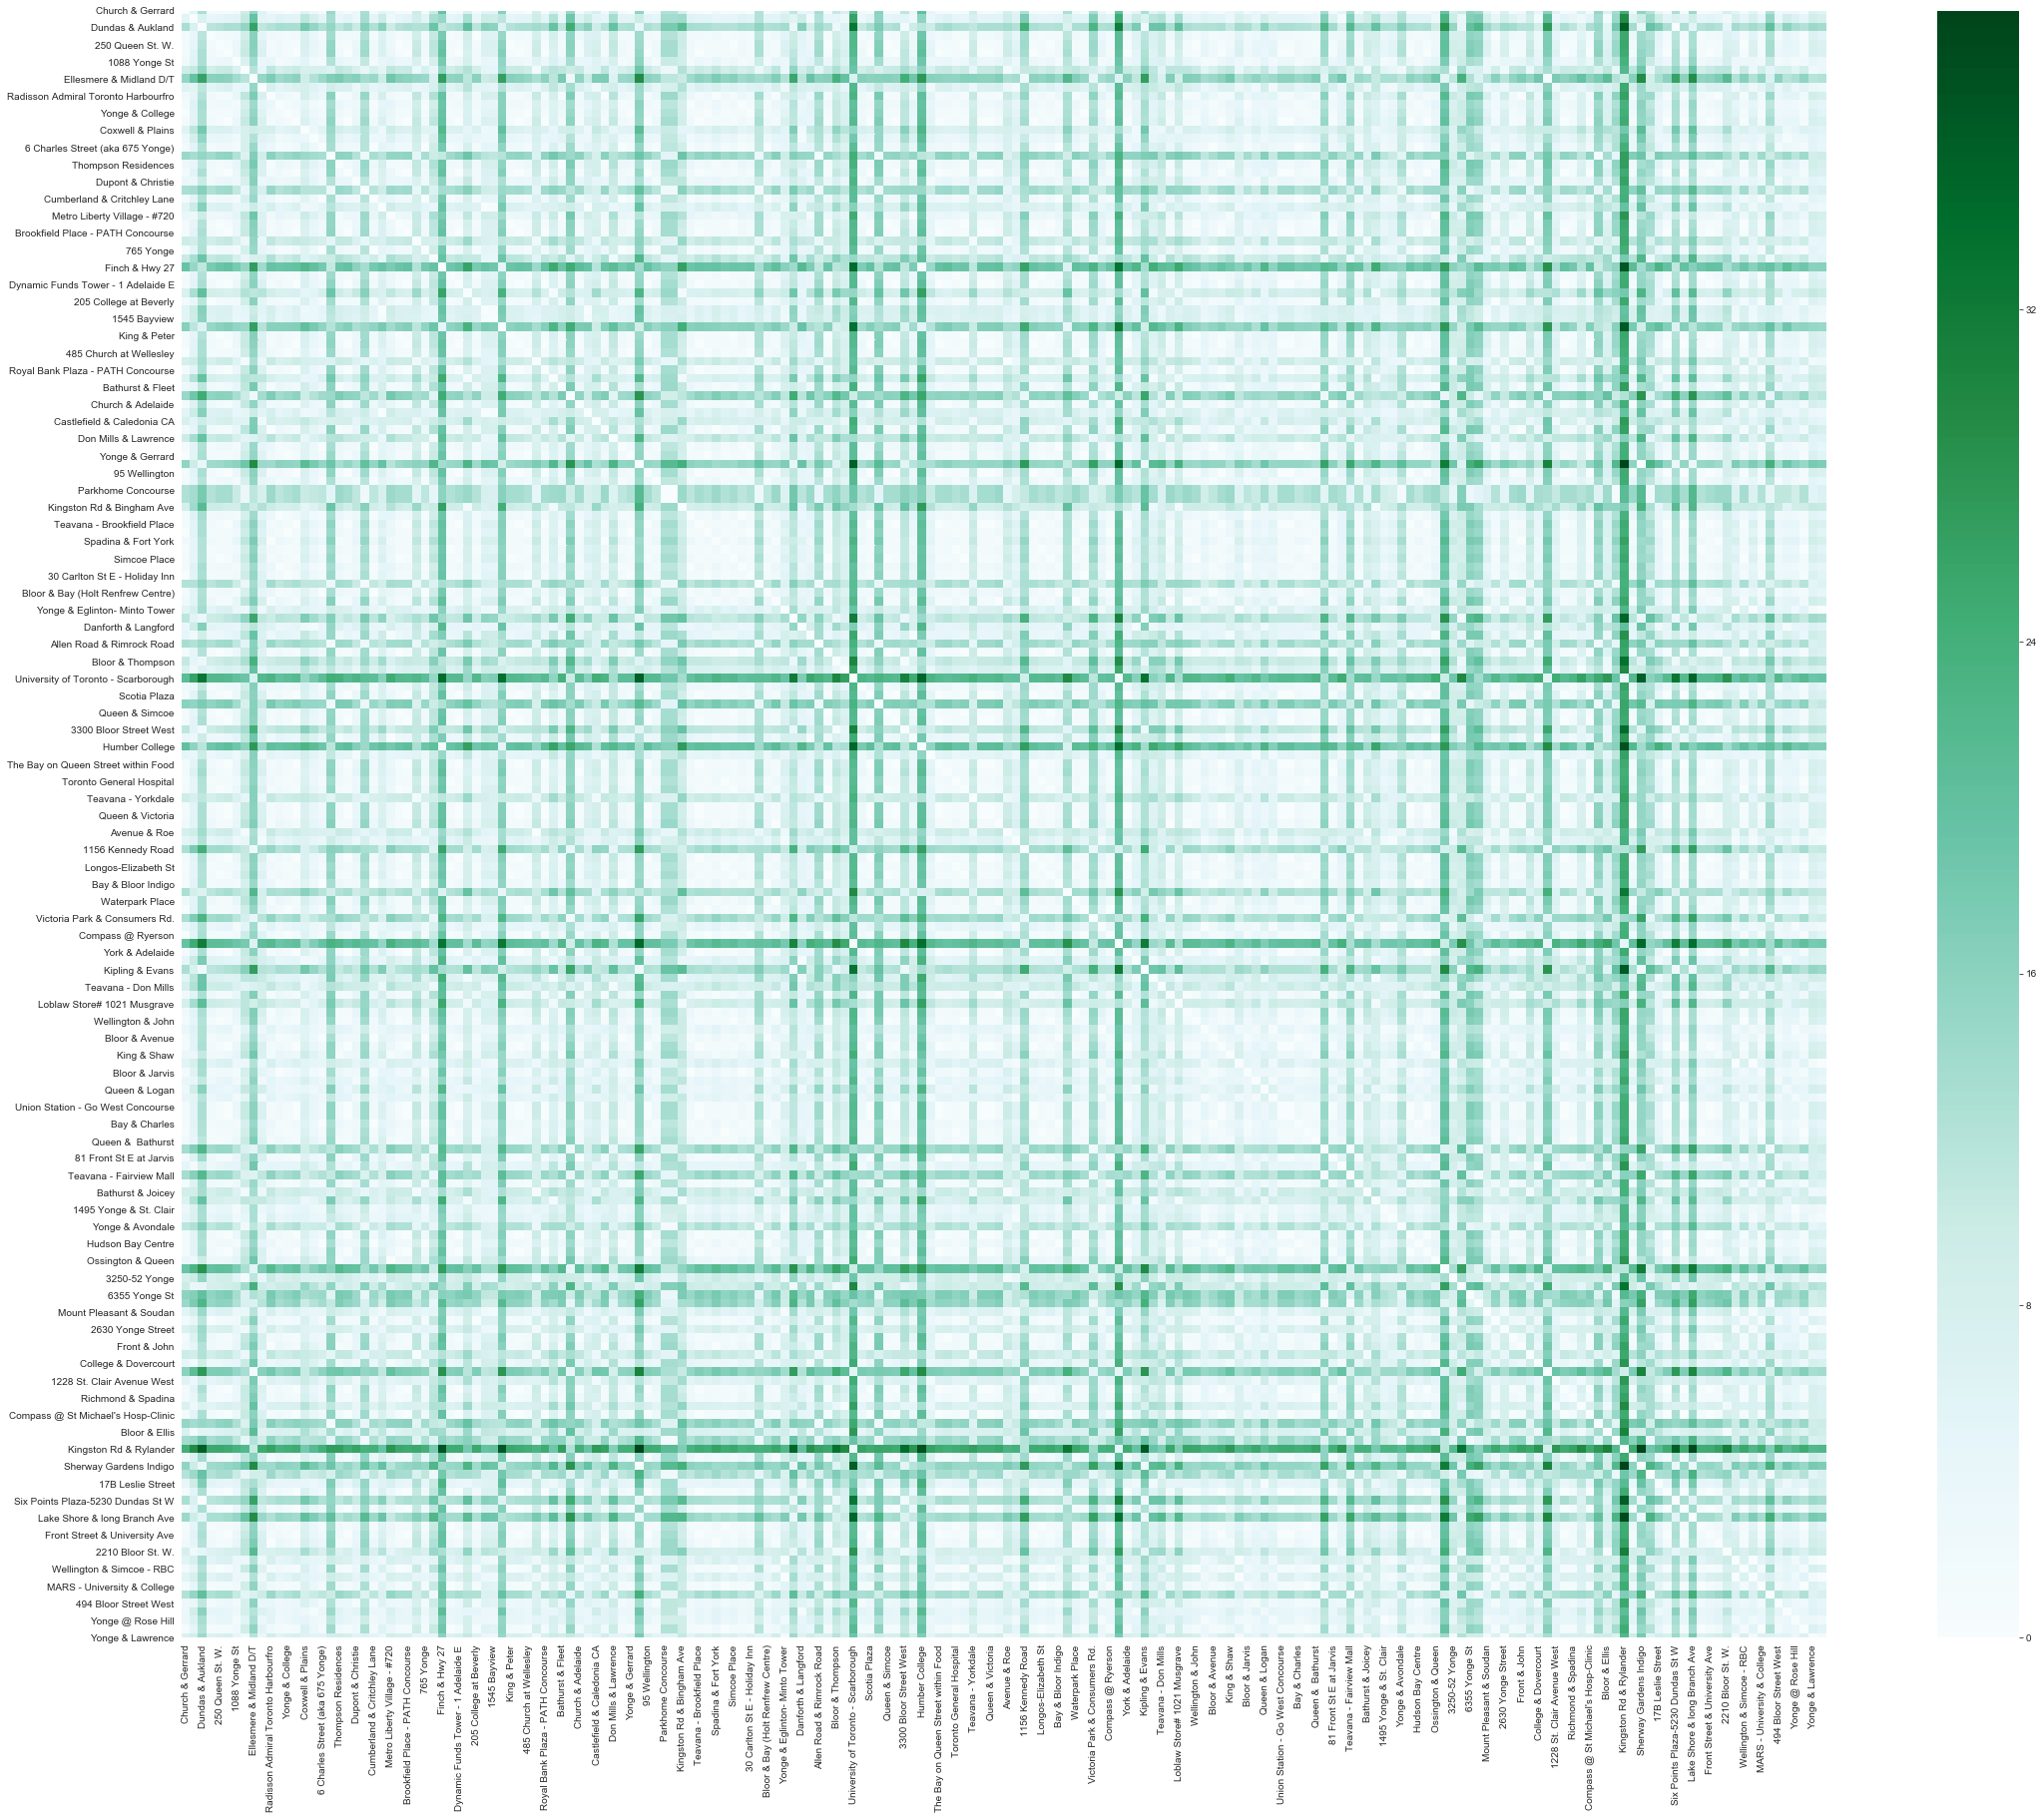

In [190]:
# Plot distance between Starbucks stores in a Heatmap
plt.figure(figsize= (40,30))
sns.heatmap(distances, square = True, cmap= 'BuGn')
plt.show()

In [117]:
distances.describe()

,Church & Gerrard,Dundas & Roncesvalles,Dundas & Aukland,University of Toronto/Toronto/Medic,250 Queen St. W.,65 Queen Street West Concourse,1088 Yonge St,York Mills Centre,Ellesmere & Midland D/T,900 Eglinton Ave. W.,Radisson Admiral Toronto Harbourfro,Bloor & Church,Yonge & College,Brookfield Place Front/Bay - PATH,Coxwell & Plains,Danforth & Broadview,6 Charles Street (aka 675 Yonge),Finch & Chesswood,Thompson Residences,Richmond Adelaide Ctr -PATH Concrse,Dupont & Christie,Bathurst & Finch,Cumberland & Critchley Lane,Longos @ Leaside,Metro Liberty Village - #720,145 Richmond Street West,Brookfield Place - PATH Concourse,Yorkdale Indigo,765 Yonge,Longo's York Mills,Finch & Hwy 27,Dundas & Elizabeth,Dynamic Funds Tower - 1 Adelaide E,2253 Queen St. E. & Hammersmith,205 College at Beverly,Laird & Wicksteed,1545 Bayview,International Plaza Hotel,King & Peter,Teavana - Scotia Plaza,485 Church at Wellesley,1740-42 Avenue Rd.,Royal Bank Plaza - PATH Concourse,1984 Queen St.East,Bathurst & Fleet,Birchmount & Sheppard,Church & Adelaide,Laird Eglinton,Castlefield & Caledonia CA,Marriott Renaissance Hotel Toronto,Don Mills & Lawrence,Bay & Cumberland,Yonge & Gerrard,Sherway Gardens,95 Wellington,Bedford & Bloor,Parkhome Concourse,Yonge & Park Home,Kingston Rd & Bingham Ave,Longos-Bloor St,Teavana - Brookfield Place,Yonge & Dundas,Spadina & Fort York,Bay & Grosvenor,Simcoe Place,8 Wellesley,30 Carlton St E - Holiday Inn,Bathurst & Sheppard,Bloor & Bay (Holt Renfrew Centre),Southcore Financial Tower,Yonge & Eglinton- Minto Tower,829 The Queensway,Danforth & Langford,King & Dufferin,Allen Road & Rimrock Road,King Street West & Blue Jays Way,Bloor & Thompson,Dundas & Quebec,University of Toronto - Scarborough,542 College / Euclid,Scotia Plaza,Dufferin & Steeles,Queen & Simcoe,Church & Shuter,3300 Bloor Street West,Hanna & Atlantic,Humber College,St. Clair & Christie,The Bay on Queen Street within Food,Loblaw Queen's Quay,Toronto General Hospital,Metro Centre CA,Teavana - Yorkdale,Yonge & King,Queen & Victoria,York & Bremner,Avenue & Roe,444 Eglinton Ave. W.,1156 Kennedy Road,Yonge & Shuter (TEC),Longos-Elizabeth St,Adelaide & Peter,Bay & Bloor Indigo,Royal York & The Westway,Waterpark Place,Bay & Dundas (TEC),Victoria Park & Consumers Rd.,Longo's St. Clair,Compass @ Ryerson,Morningside & Lawrence,York & Adelaide,Danforth & Monarch Park,Kipling & Evans,Queen & Brookmount - Toronto,Teavana - Don Mills,Longos - Maple Leaf Square,Loblaw Store# 1021 Musgrave,Queens Quay & York,Wellington & John,95 St. Clair Avenue West,Bloor & Avenue,University &Wellington,King & Shaw,Eglinton and Holly,Bloor & Jarvis,Bathurst & St. Clair,Queen & Logan,446 Spadina Rd.,Union Station - Go West Concourse,TD Bank Tower - PATH Concourse,Bay & Charles,761 Bay Street,Queen & Bathurst,Fairview Mall - Food Court,81 Front St E at Jarvis,Dufferin Mall,Teavana - Fairview Mall,Parliament & Aberdeen,Bathurst & Joicey,Kingston Road & Main,1495 Yonge & St. Clair,1909 Yonge St.,Yonge & Avondale,Teavana - Toronto Eaton Centre,Hudson Bay Centre,First Canadian Place,Ossington & Queen,Midland & McNicoll,3250-52 Yonge,150 Park Lawn Road,6355 Yonge St,Aramark @ Seneca College,Mount Pleasant & Soudan,U of Toronto - Robarts Library,2630 Yonge Street,King & Sherbourne,Front & John,Yorkdale Shopping Centre,College & Dovercourt,Scarborough Town Centre,1228 St. Clair Avenue West,Toronto Eaton Centre L1,Richmond & Spadina,Keele & St. Clair,Compass @ St Michael's Hosp-Clinic,York University-Centre for Film & T,Bloor & Ellis,Yonge & Finch,Kingston Rd & Rylander,Yonge & Queens Quay,Sherway Gardens Indigo,Bayview Village/Chapters,17B Leslie Street,Indigo Toronto Eaton Centre,Six Points Plaza-5230 Dundas St W,Wellington & York TD PATH Foodcourt,Lake Shore & long Branch Ave,525 University Avenue,Front Street & University Ave,Spadina & Queens Quay,2210 Bloor St. W.,2293 Yonge Street,Wellington & Simcoe - RBC,Yonge & Erskine,MARS - University & College,North York Regional Hospital - Toro,494 Bloo

In [330]:
df['Ownership Type'].unique()

array(['Licensed', 'Joint Venture', 'Company Owned', 'Franchise'],
      dtype=object)

In [333]:
df.loc[df['Ownership Type'] == 'Franchise', 'Country'].unique()

array(['FR', 'GB'], dtype=object)

In [334]:
df.loc[df['Ownership Type'] == 'Joint Venture', 'Country'].unique()

array(['AR', 'CN', 'CZ', 'HU', 'IN', 'JP', 'KR', 'MY', 'PL', 'RU', 'TW'],
      dtype=object)

In [335]:
df.loc[df.Country == 'AR']

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude,type_color
145,Starbucks,1278-139526,Alto Avelleneda,Licensed,Avenida Gral. Guemes 897,Avellaneda,B,AR,B1870,4204-3785,GMT-03:00 America/Argentina/Bu,-58.37,-34.68,orange
146,Starbucks,16436-159304,Soleil,Licensed,Yrigiyen 2647,Boulogne,B,AR,1609,NaN,GMT-03:00 America/Argentina/Bu,-57.87,-34.88,orange
147,Starbucks,47294-254164,Arevalo,Licensed,"Nicaragua 6045, CABA",Buenos Aires,B,AR,NaN,NaN,GMT-03:00 America/Argentina/Bu,-58.44,-34.58,orange
148,Starbucks,25823-198067,Terrazas de Mayo,Licensed,"Cruce Ruta 8 y 202, San Miguel",Buenos Aires,B,AR,C1663,NaN,GMT-03:00 America/Argentina/Bu,-58.70,-34.53,orange
149,Starbucks,15008-157047,San Isidro,Licensed,"Belgrano, 263 San Isidro",Buenos Aires,B,AR,B1642,NaN,GMT-03:00 America/Argentina/Bu,-58.51,-34.47,orange
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,Starbucks,47289-254786,Estrada,Licensed,"Estrada 159 , Cordoba",Cordoba,X,AR,5000,NaN,GMT-03:00 America/Argentina/Bu,-64.20,-31.44,orange
249,Starbucks,16161-168806,Canada,Licensed,Av. Colon 608,Cordoba,X,AR,5000,NaN,GMT-03:00 America/Argentina/Bu,-64.19,-31.41,orange
250,Starbucks,22131-168807,Dinosaurio Mall,Licensed,Av. Fuerza Aerea Argentina 1700 B,Cordoba,X,AR,C5000,NaN,GMT-03:00 America/Argentina/Bu,-64.24,-31.36,orange
251,Starbucks,16290-163049,Nuevocentro,Licensed,Duarte Quiroz 1400,Cordoba,X,AR,5000,NaN,GMT-03:00 America/Argentina/Bu,-64.20,-31.41,orange


In [338]:
me_list = ['BH', 'EG', 'IQ', 'JO', 'KW', 'LB', 'LY', 'MA', 'OM', 'PS', 'QA', 'SA', 'SD', 'SY', 'TN', 'TR', 'AE', 'YE']
df.loc[df.Country.isin(me_list), 'Ownership Type'].value_counts()

Licensed    815
Name: Ownership Type, dtype: int64

In [339]:
df.loc[df.Country.isin(['FR']), 'Ownership Type'].value_counts()

Company Owned    74
Licensed         43
Franchise        15
Name: Ownership Type, dtype: int64

In [341]:
df.loc[df.Country.isin(['GB']), 'Ownership Type'].value_counts()

Company Owned    347
Franchise        302
Licensed         252
Name: Ownership Type, dtype: int64